db_result :  [('123.123.123.123', 'wpaper.gif'), ('123.123.123.123', 'No Image'), ('123.123.123.123', '5star2000.gif'), ('123.123.123.123', '5star.gif'), ('123.123.123.123', 'a2hlogo.jpg'), ('123.123.123.123', 'No Image')]
    0   1   2
0  10  20  30
1  40  50  60
       col-1  col-2  col-3
row-1     10     20     30
row-2     40     50     60
                IP           PICS
0  123.123.123.123     wpaper.gif
1  123.123.123.123       No Image
2  123.123.123.123  5star2000.gif
3  123.123.123.123      5star.gif
4  123.123.123.123    a2hlogo.jpg
5  123.123.123.123       No Image
top 3 rows
                IP           PICS
0  123.123.123.123     wpaper.gif
1  123.123.123.123       No Image
2  123.123.123.123  5star2000.gif
bottom 3 rows
                IP         PICS
3  123.123.123.123    5star.gif
4  123.123.123.123  a2hlogo.jpg
5  123.123.123.123     No Image
IP Colum
0    123.123.123.123
1    123.123.123.123
2    123.123.123.123
3    123.123.123.123
4    123.123.123.123
5    123.123.

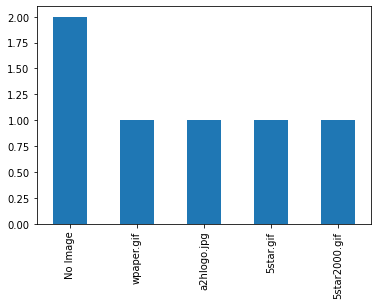

In [1]:
'''
send DB data to files
Many ways
'''

import sqlite3
con = sqlite3.connect("my_database.sqlite3")
cur = con.cursor()
cur.execute("SELECT * FROM MY_WEBSITE_DATA")
db_result = cur.fetchall()

print("db_result : ",db_result)

# 1 -way
F1=open("db_dump_1.txt","w")
print("IP\tPICS",sep="\t",file=F1)

for each_row in db_result:
    print(*each_row,sep="\t",file=F1) # 8each_row -> unpacking --> print('123.123.123.123', 'wpaper.gif')
F1.close()


# 2nd -way
F1=open("db_dump_2.csv","w")
print("IP","PICS",sep=",",file=F1)

for each_row in db_result:
    print(*each_row,sep=",",file=F1) # 8each_row -> unpacking --> print('123.123.123.123', 'wpaper.gif')
F1.close()

# pandas library
# Inside pandas, we have 2 classes
# 1. Series class for 1D data
# 2. DataFrame class for 2D data like , csv, xlsx,db etc

# We have more and more methods inside dataframe we can use it


import pandas as pd

L1 = [[10,20,30],[40,50,60]]
L2 = list([[10,20,30],[40,50,60]])

df1 = pd.DataFrame([[10,20,30],[40,50,60]])
print(df1) # table format with row and columns having index

df2 = pd.DataFrame([[10,20,30],[40,50,60]],index=["row-1","row-2"],columns=["col-1","col-2","col-3"])
print(df2)


df3 = pd.DataFrame(db_result,columns=["IP","PICS"])
print(df3)

df3.to_csv("db_dump_3.csv")
df3.to_excel("db_dump_4.xlsx")
df3.to_json("db_dump_5.json")

print("top 3 rows")
print(df3.head(3))

print("bottom 3 rows")
print(df3.tail(3))

print("IP Colum")
print(df3["IP"])


print("IP Colum count")
print(df3["IP"].count())

print("Value count of pics column")
print(df3["PICS"].value_counts())

my_value_count = df3["PICS"].value_counts()

import matplotlib.pyplot as plt

my_value_count.plot()
plt.show()

my_value_count.plot.bar()
plt.savefig("MyGraph.png",bbox_inches="tight")

# to_excel -> one sheet
# to more sheet in single workbbok, we need to use another class

my_writer = pd.ExcelWriter("MyReport.xlsx",engine="xlsxwriter") # we have n number of librries to interact with excel. Engine tells which library you want to use

# Default - ONLY One sheet will get created.
# send my_value_count to default sheet
my_value_count.to_excel(my_writer,sheet_name="mydata")

# To create one more sheet in same excel work book
# steps are 

# Step-1 : obtain refrence to workbook
wb = my_writer.book

# Step-2 : add new sheet
new_sheet = wb.add_worksheet("mygraphsheet")

# Step-3 : insert image "MyGraph.png"

#new_sheet.insert_image("Which Cell ?","Which Image ?")
new_sheet.insert_image("B2","MyGraph.png")

my_writer.close()
